In [5]:
from pyspark.sql import SparkSession
import pandas
from matplotlib.pyplot import figure
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
spark = SparkSession.builder.appName("minadzd").getOrCreate()

In [6]:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [7]:
df = spark.read.format("csv").option("inferSchema", "true").option("header", "true").option("index", "true").load("data.csv")

In [8]:
cols = []
for i in df.columns:
    try:
        int(i)
    except:
        if i != "id" and i != "SoilType":
            cols.append(i)
vassembler = VectorAssembler(inputCols=cols, outputCol="Vec")
df2 = vassembler.transform(df)
df3 = StandardScaler(inputCol="Vec", outputCol="Scaled", withStd=True, withMean=True).fit(df2).transform(df2)
df3.show(2,truncate=False)

+---+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+--------+-----------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id |Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|1  |2  |3  |4  |2702|2703|2704|2705|2706|2717|3501|3502|4201|4703|4704|4744|4758|5101|5151|6101|6102|6731|71

C:\Users\Karol\AppData\Local\Temp/ipykernel_13208/3145140441.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=figure(figsize=(8, 6), dpi=80))


array([[<AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Aspect'}>,
        <AxesSubplot:title={'center':'Slope'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Vertical_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Roadways'}>],
       [<AxesSubplot:title={'center':'Hillshade_9am'}>,
        <AxesSubplot:title={'center':'Hillshade_Noon'}>,
        <AxesSubplot:title={'center':'Hillshade_3pm'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

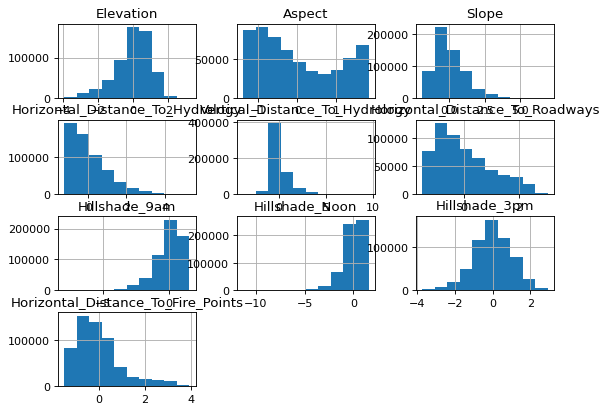

In [9]:
data = df3.select("scaled").toPandas()
data = pandas.DataFrame(data["scaled"].to_list(), columns=["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"])
data.hist(ax=figure(figsize=(8, 6), dpi=80))

In [10]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05
mean,-1.337446e-14,-4.382234e-15,1.411957e-15,-5.697921e-16,-2.068236e-16,-5.666614e-16,-7.995092e-15,-4.002633e-15,1.341516e-15,6.151877e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.930090e+00,-1.390864e+00,-1.883447e+00,-1.267603e+00,-3.763925e+00,-1.507224e+00,-7.924801e+00,-1.129658e+01,-3.723841e+00,-1.495468e+00
25%,-5.370482e-01,-8.726080e-01,-6.815623e-01,-7.594858e-01,-6.761935e-01,-7.979110e-01,-5.284314e-01,-5.219725e-01,-6.147238e-01,-7.221679e-01
50%,1.308453e-01,-2.560616e-01,-1.473915e-01,-2.419589e-01,-2.816501e-01,-2.264842e-01,2.186767e-01,1.356328e-01,1.232510e-02,-2.041174e-01
75%,7.273064e-01,9.323539e-01,5.203219e-01,5.390361e-01,3.873583e-01,6.271286e-01,7.042970e-01,6.920681e-01,6.655010e-01,4.302302e-01
max,3.209585e+00,1.825899e+00,6.930371e+00,5.304988e+00,9.513319e+00,3.057135e+00,1.563471e+00,1.552013e+00,2.912426e+00,3.921407e+00


### Usuwanie pustych

In [11]:
print(df3.count())
df3 = df3.dropna()
print(df3.count())

581012
581012


### Usuwanie odstających wartości

<AxesSubplot:>

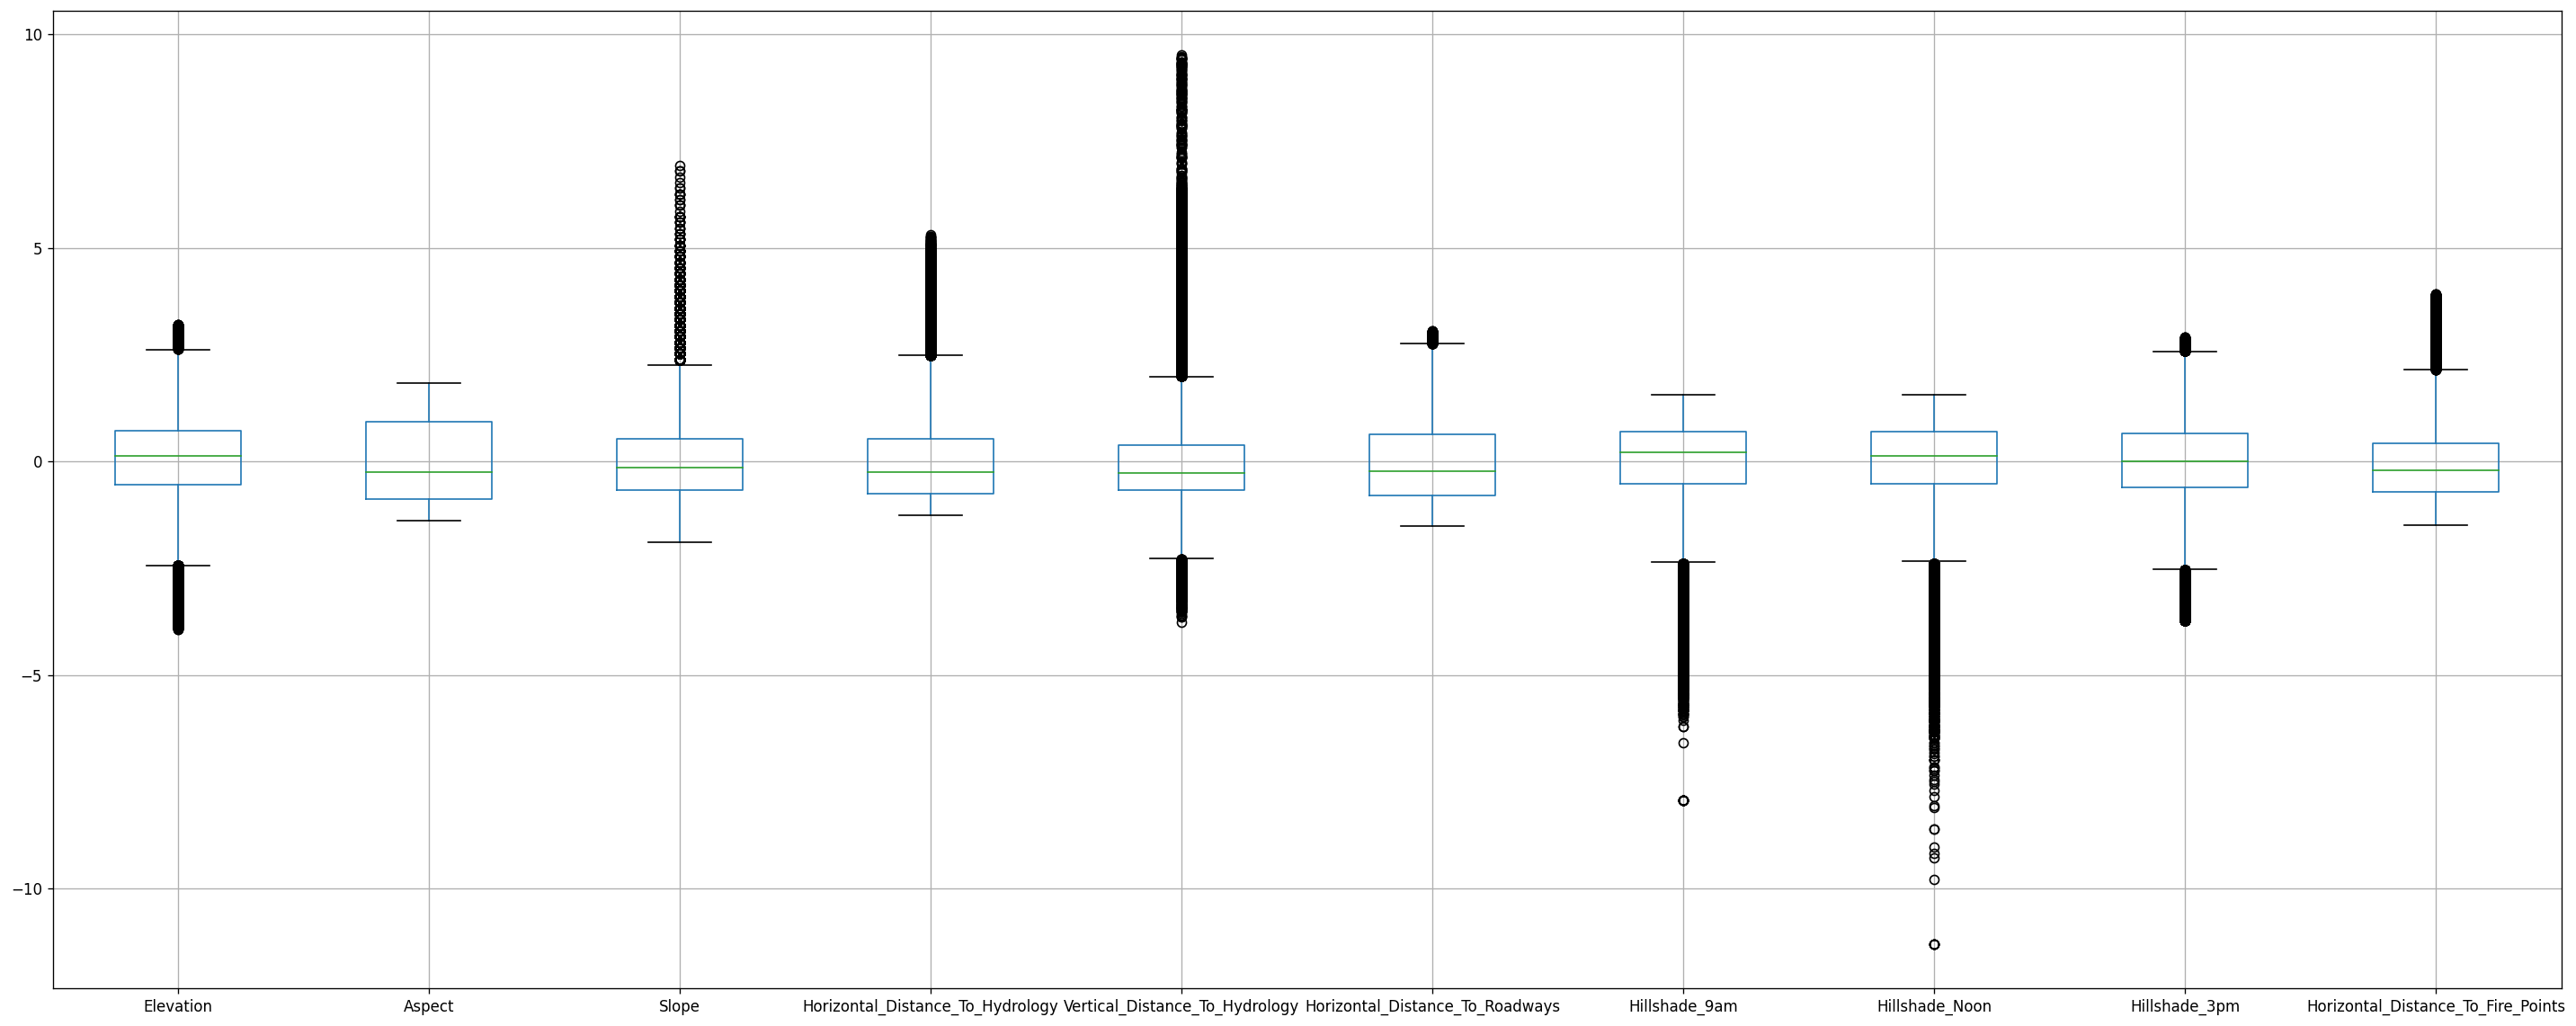

In [12]:
figure(figsize=(30, 12), dpi=120)
data.boxplot()

In [13]:
df4 = df3
for i in df.columns:
    try:
        int(i)
    except:
        if i != "id" and i != "SoilType":
            quantiles = df3.stat.approxQuantile(i, [0.25,0.75],0.0)
            Q1 = quantiles[0]
            Q3 = quantiles[1]
            IQR = Q3 - Q1
            lowerRange = Q1 - 1.5*IQR
            upperRange = Q3+ 1.5*IQR
            df4 = df4.filter(f"{i} >= {lowerRange} and {i} <= {upperRange}")

print(df3.count())
print(df4.count())

581012
472673


<AxesSubplot:>

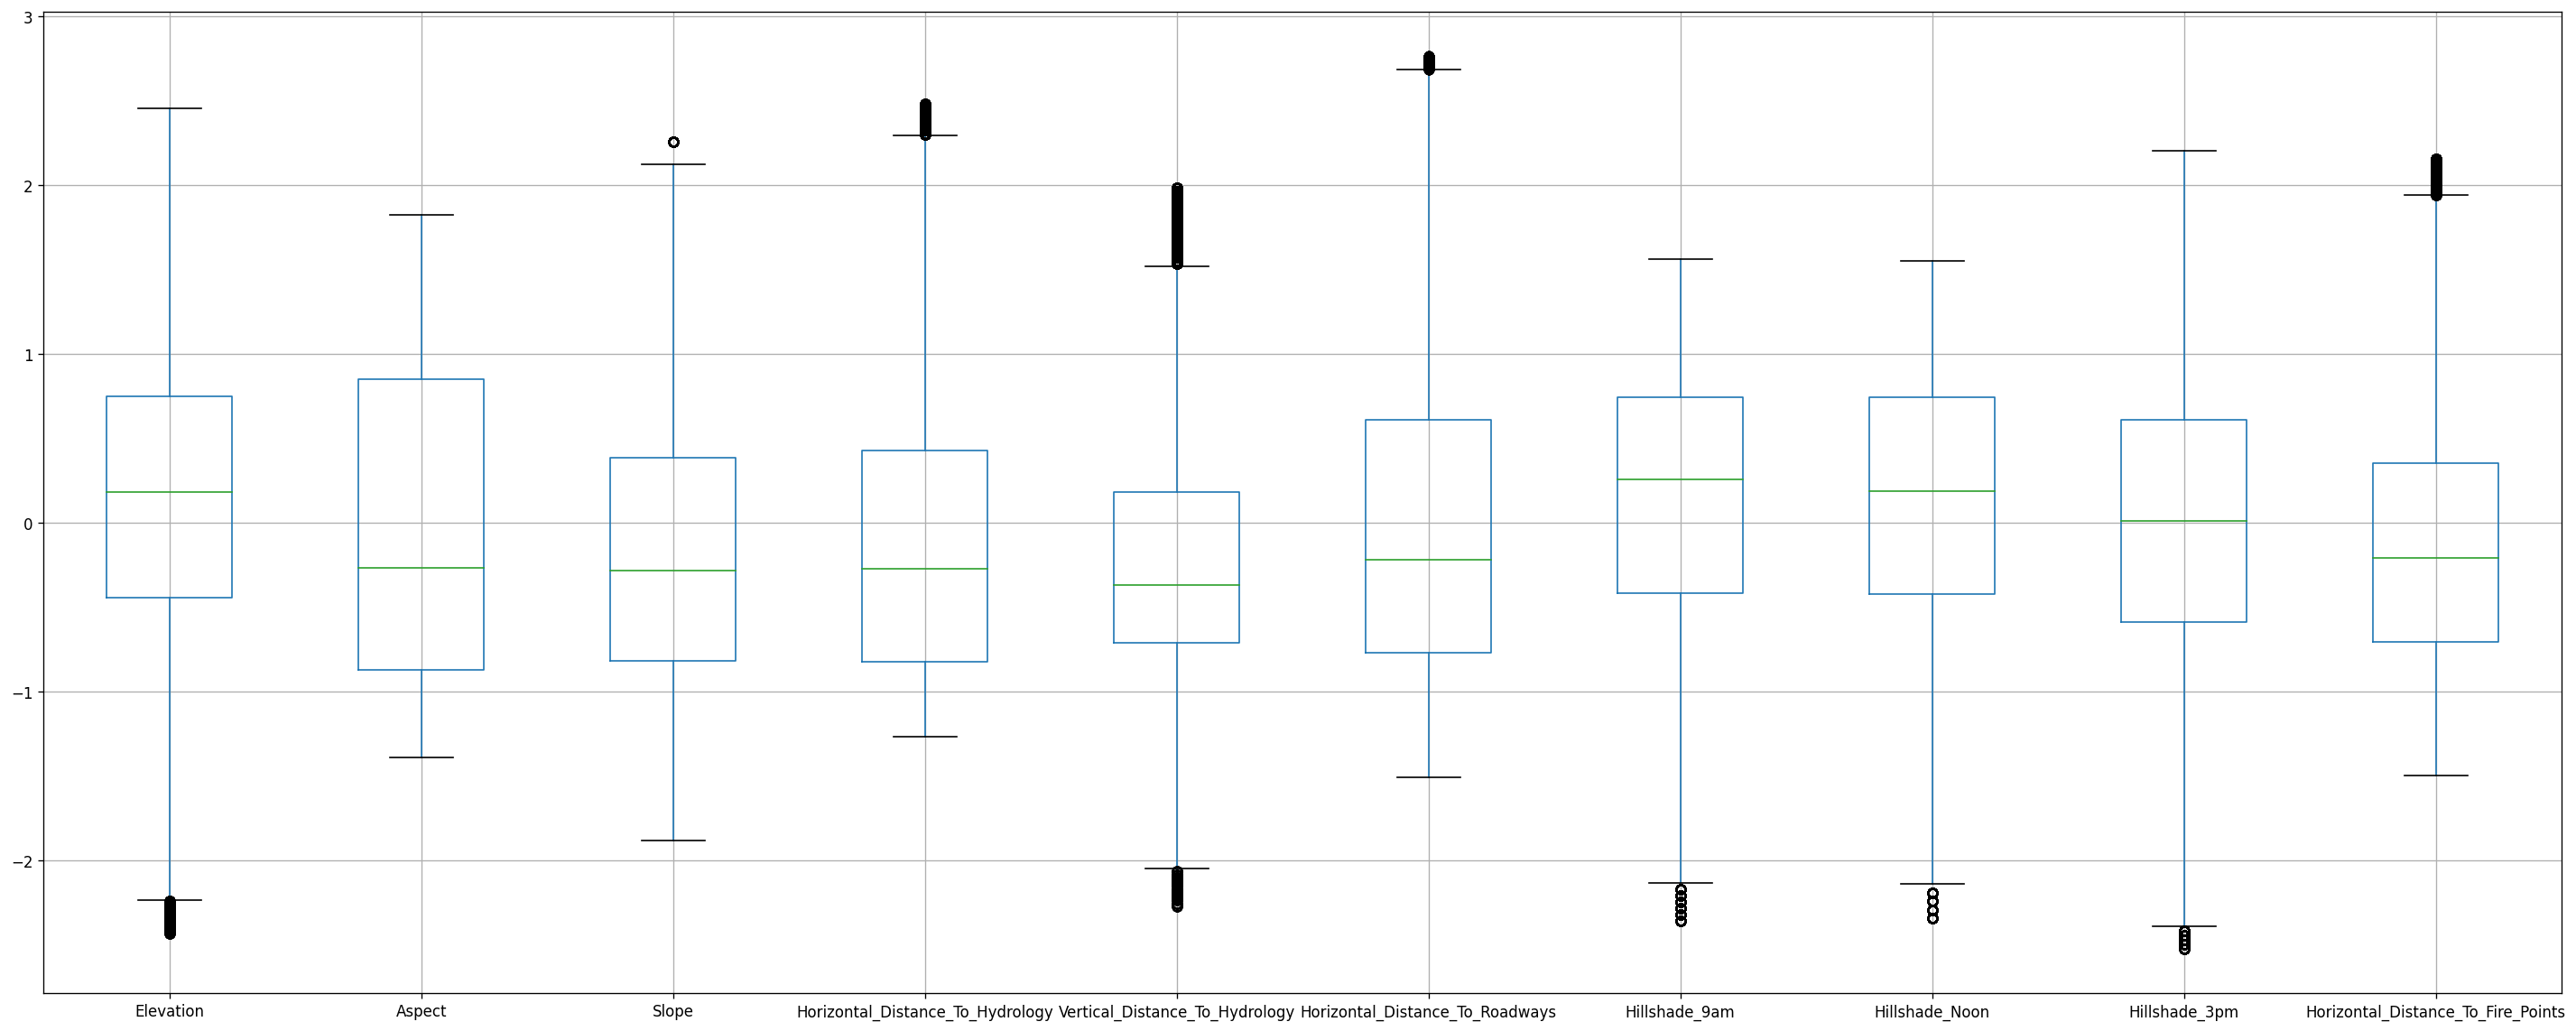

In [14]:
data = df4.select("scaled").toPandas()
data = pandas.DataFrame(data["scaled"].to_list(), columns=["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"])
figure(figsize=(30, 12), dpi=120)
data.boxplot()

In [15]:
data = df4.toPandas()
c = data.corr().abs()
for i in c.columns:
    for j in c[i].index:
        if c[i][j] > 0.5 and i != j and i != "id" and j != "id":
            print(i, j, c[i][j])
# Warto wyrzucić zmienne: Hillshade_9am Hillshade_3pm Horizontal_Distance_To_Hydrology 1 4

Aspect Hillshade_9am 0.5922415408055716
Aspect Hillshade_3pm 0.6564099851570395
Horizontal_Distance_To_Hydrology Vertical_Distance_To_Hydrology 0.5385576230081234
Vertical_Distance_To_Hydrology Horizontal_Distance_To_Hydrology 0.5385576230081234
Hillshade_9am Aspect 0.5922415408055716
Hillshade_9am Hillshade_3pm 0.8334401103665783
Hillshade_Noon Hillshade_3pm 0.6178088274497852
Hillshade_3pm Aspect 0.6564099851570395
Hillshade_3pm Hillshade_9am 0.8334401103665783
Hillshade_3pm Hillshade_Noon 0.6178088274497852
1 3 0.8369751671391537
1 7745 0.5486412303963626
3 1 0.8369751671391537
4 2717 0.5395849897953516
2717 4 0.5395849897953516
7745 1 0.5486412303963626


In [16]:
# Potwierdzenie, że nie ma już więcej kolumn o korelacji > 0.5
data = data.drop(["Hillshade_9am", "Hillshade_3pm", "Horizontal_Distance_To_Hydrology", "1", "4"], axis=1)
c = data.corr().abs()
for i in c.columns:
    for j in c[i].index:
        if c[i][j] > 0.5 and i != j and i != "id" and j != "id":
            print(i, j, c[i][j])
            
data.columns

Index(['id', 'Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_Noon',
       'Horizontal_Distance_To_Fire_Points', '2', '3', '2702', '2703', '2704',
       '2705', '2706', '2717', '3501', '3502', '4201', '4703', '4704', '4744',
       '4758', '5101', '5151', '6101', '6102', '6731', '7101', '7102', '7103',
       '7201', '7202', '7700', '7701', '7702', '7709', '7710', '7745', '7746',
       '7755', '7756', '7757', '7790', '8703', '8707', '8708', '8771', '8772',
       '8776', 'SoilType', 'Vec', 'Scaled'],
      dtype='object')

In [17]:
df5 = df4.drop("Hillshade_9am", "Hillshade_3pm", "Horizontal_Distance_To_Hydrology", "1", "4", "Vec", "Scaled", "id")
df5

DataFrame[Elevation: int, Aspect: int, Slope: int, Vertical_Distance_To_Hydrology: int, Horizontal_Distance_To_Roadways: int, Hillshade_Noon: int, Horizontal_Distance_To_Fire_Points: int, 2: int, 3: int, 2702: int, 2703: int, 2704: int, 2705: int, 2706: int, 2717: int, 3501: int, 3502: int, 4201: int, 4703: int, 4704: int, 4744: int, 4758: int, 5101: int, 5151: int, 6101: int, 6102: int, 6731: int, 7101: int, 7102: int, 7103: int, 7201: int, 7202: int, 7700: int, 7701: int, 7702: int, 7709: int, 7710: int, 7745: int, 7746: int, 7755: int, 7756: int, 7757: int, 7790: int, 8703: int, 8707: int, 8708: int, 8771: int, 8772: int, 8776: int, SoilType: int]

In [18]:
feature_names = df5.columns.copy()
feature_names.remove("SoilType")

In [19]:
vassembler = VectorAssembler(inputCols=feature_names, outputCol="pre_features")
df6 = vassembler.transform(df5)
df6 = StandardScaler(inputCol="pre_features", outputCol="features", withStd=True, withMean=True).fit(df6).transform(df6)

In [20]:
from pyspark.ml.classification import DecisionTreeClassifier
df7 = df6.select(["features", "SoilType"])
(trainingData, testData) = df7.randomSplit([0.7, 0.3])
dtc = DecisionTreeClassifier(featuresCol="features", labelCol="SoilType").fit(trainingData)
pred = dtc.transform(testData)

In [21]:
pred.show()

+--------------------+--------+--------------------+--------------------+----------+
|            features|SoilType|       rawPrediction|         probability|prediction|
+--------------------+--------+--------------------+--------------------+----------+
|[-2.9015083635788...|       4|[0.0,0.0,141.0,77...|[0.0,0.0,0.053714...|       6.0|
|[-2.9015083635788...|       4|[0.0,0.0,142.0,42...|[0.0,0.0,0.021759...|       3.0|
|[-2.9015083635788...|       6|[0.0,0.0,142.0,42...|[0.0,0.0,0.021759...|       3.0|
|[-2.8932828336196...|       6|[0.0,0.0,142.0,42...|[0.0,0.0,0.021759...|       3.0|
|[-2.8932828336196...|       4|[0.0,0.0,142.0,42...|[0.0,0.0,0.021759...|       3.0|
|[-2.8932828336196...|       4|[0.0,0.0,142.0,42...|[0.0,0.0,0.021759...|       3.0|
|[-2.8932828336196...|       3|[0.0,0.0,312.0,79...|[0.0,0.0,0.219101...|       3.0|
|[-2.8891700686400...|       4|[0.0,0.0,142.0,42...|[0.0,0.0,0.021759...|       3.0|
|[-2.8891700686400...|       4|[0.0,0.0,142.0,42...|[0.0,0.0,0.02

In [22]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix
evaluator=MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="SoilType")
acc = evaluator.evaluate(pred)
print("Prediction Accuracy: ", acc)
y_pred=pred.select("prediction").collect()
y_orig=pred.select("SoilType").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Prediction Accuracy:  0.686713357610039
Confusion Matrix:
[[39194 15027    58     0     0     0   392]
 [15612 53140  1047     0     0    58    15]
 [    0  1533  4364     0     0   343     0]
 [    0     6   206     0     0    13     0]
 [    0  2113   227     0     0     0     0]
 [    0  1700  1145     0     0   740     0]
 [ 3112    61     0     0     0     0  1619]]


<AxesSubplot:>

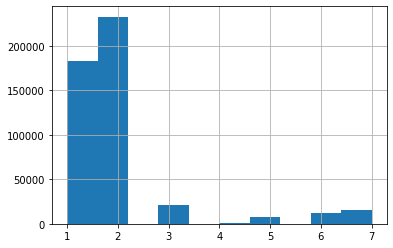

In [23]:
df6.toPandas()["SoilType"].hist()

In [24]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="SoilType", featuresCol="features", numTrees=10).fit(trainingData)
pred = rf.transform(testData)

In [25]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix
evaluator=MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="SoilType")
acc = evaluator.evaluate(pred)
print("Prediction Accuracy: ", acc)
y_pred=pred.select("prediction").collect()
y_orig=pred.select("SoilType").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Prediction Accuracy:  0.6406488030645966
Confusion Matrix:
[[39482 15168    21     0     0     0     0]
 [15574 53992   306     0     0     0     0]
 [    0  4452  1788     0     0     0     0]
 [    0   221     4     0     0     0     0]
 [    0  2320    20     0     0     0     0]
 [    0  3422   163     0     0     0     0]
 [ 4790     2     0     0     0     0     0]]
